# Audio Processing

In this livecode we will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates.

In [1]:
!pip install scipy --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/mic_recording_original.png" width=1000>

In [3]:
R = 44100 # Sampling rate
D = 3     # Duration of the sound

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants).

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [5]:
def note(f):
    # Generate time values
    t = np.linspace(0, D, int(R * D), endpoint=False)
    
    # Compute the sine values for each time t
    y = np.sin(2 * np.pi * f * t)
    
    return y

❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

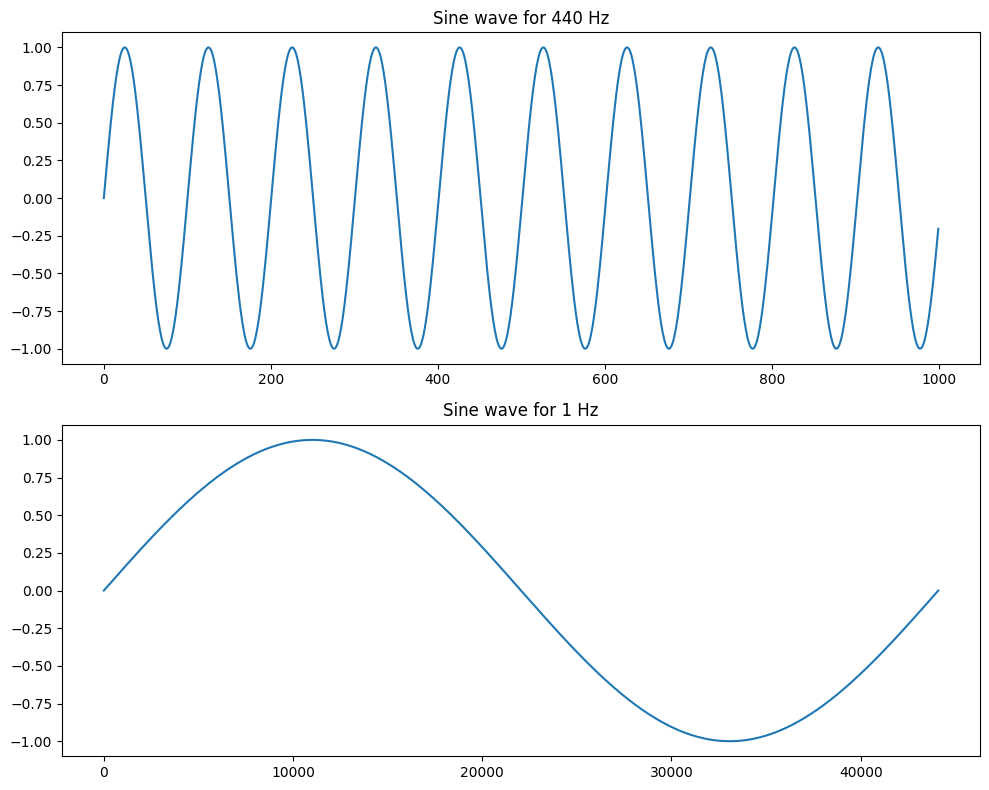

In [6]:
# Generate the signals for both frequencies
signal_440 = note(440)
signal_1 = note(1)

# Create plots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot for 440 Hz
axs[0].plot(signal_440[:1000])  # Displaying only the first 1000 samples for clarity
axs[0].set_title("Sine wave for 440 Hz")

# Plot for 1 Hz
axs[1].plot(signal_1[:R])  # Displaying samples for the entire second to visualize one complete cycle
axs[1].set_title("Sine wave for 1 Hz")

plt.tight_layout()
plt.show()

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason. Play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [7]:
# Generate the A note (440 Hz) signal
A_note = note(440)

# Play the generated signal
Audio(A_note, rate=R)

❓ Try and layer several notes, like `A` + the perfect fifth, major (or minor) third, etc into a `chord` variable. Play it!

<details>
    <summary>💡 <strong>Hint</strong></summary>
    
Check out the [Frequency Ratio](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) on Wikipedia. For instance, the perfect fifth has a $\frac{3}{2}$ ratio
</details>

In [8]:
# Generate the A note (440 Hz) signal
A_note = note(440)

# Generate the E note (660 Hz) signal which is the perfect fifth of A
E_note = note(440 * 3/2)  # 3/2 ratio for perfect fifth

# Combine the two notes to create a chord
chord = A_note + E_note

# Normalize the chord to ensure the amplitude is within [-1, 1]
chord = chord / max(abs(chord))

# Play the chord
Audio(chord, rate=R)

❓ Plot the first `1000` samples of the chord

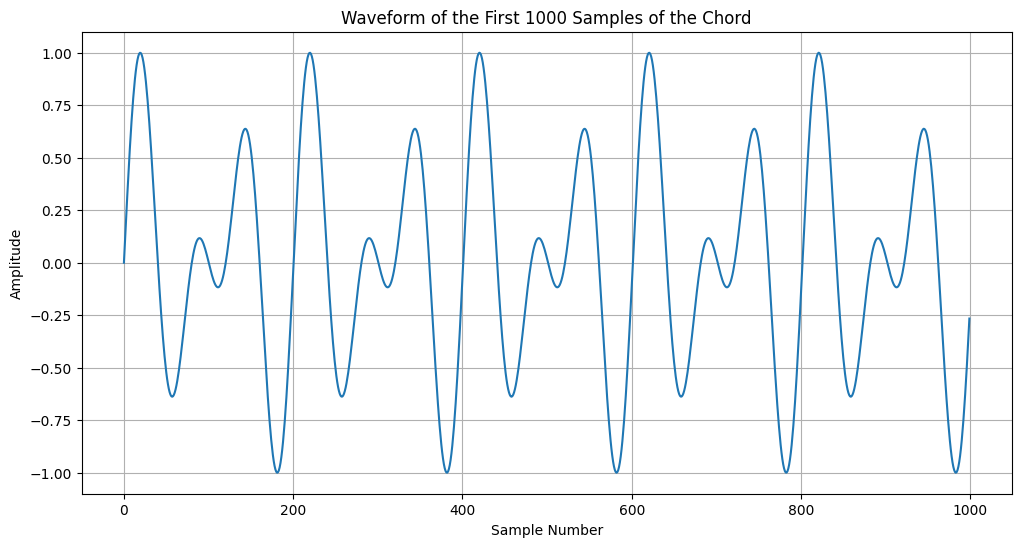

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(chord[:1000])
plt.title("Waveform of the First 1000 Samples of the Chord")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/fourier_transformation.png" width=550>

Let's use [`scipy.fft`](https://docs.scipy.org/doc/scipy/tutorial/fft.html) to analyze the signals we built above.

Run the following code. Change the `chord` above, and replot it. What do you see?

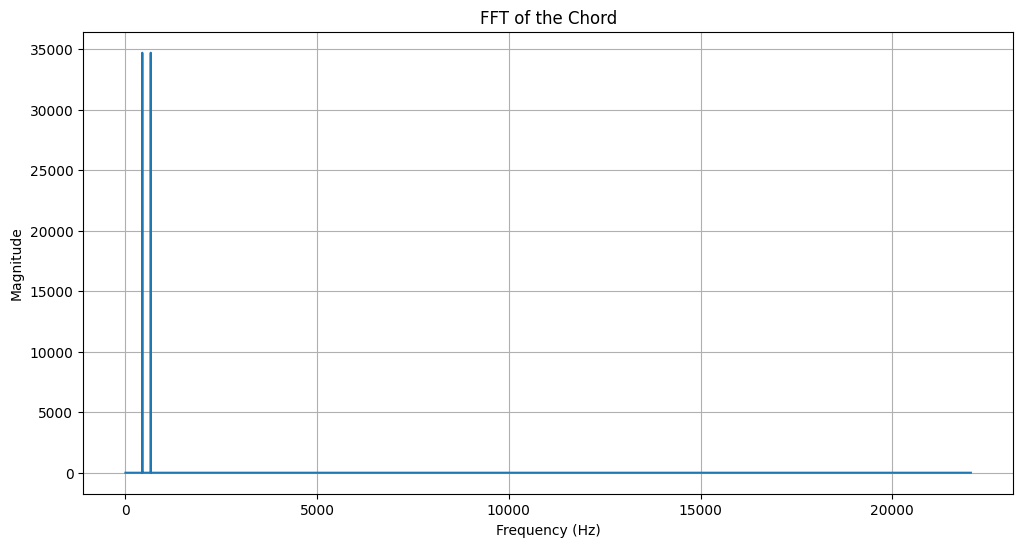

In [15]:
from scipy.fft import fft

chord_fft = fft(chord)
frequencies = np.linspace(0, R, len(chord_fft))

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(chord_fft)[:len(chord_fft)//2])
plt.title("FFT of the Chord")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

## Real-life samples

Let's perform `fft` on the `.wav` files in the folder:

In [16]:
!ls -lh *.wav

-rw-r--r--  1 francoisgirard  staff   505K Jul 10 15:04 bird.wav
-rw-r--r--  1 francoisgirard  staff   379K Jul 10 15:04 blissful_bell.wav
-rw-r--r--  1 francoisgirard  staff   400K Jul 10 15:04 guitar_G.wav
-rw-r--r--  1 francoisgirard  staff   265K Jul 10 15:04 piano_F.wav
-rw-r--r--  1 francoisgirard  staff   100K Jul 10 15:04 snare_80s.wav


Let's load the audio of `bird.wav` and visualize the sound **waveform**

In [17]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

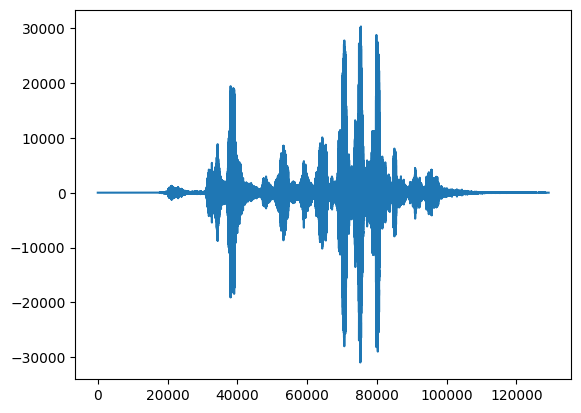

In [18]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

Now let's apply and plot the FFT of that signal & play it

In [19]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

NameError: name 'plot_fft' is not defined

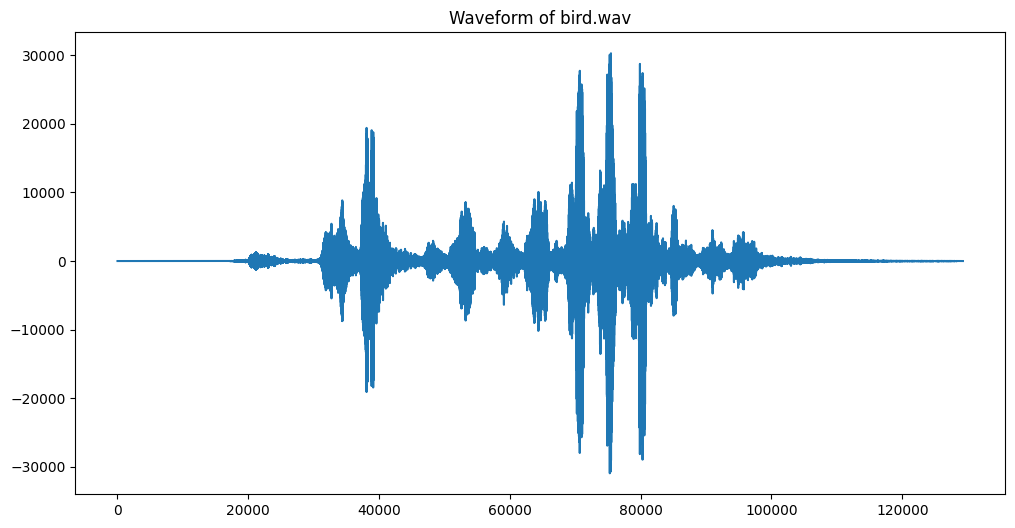

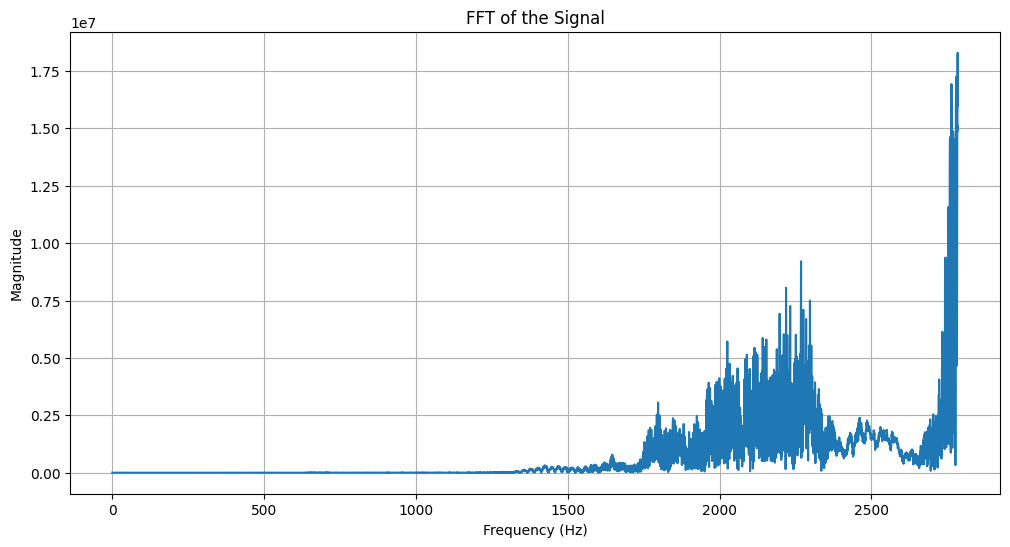

In [20]:
from scipy.fft import fft

def plot_fft(signal, rate, limit):
    signal_fft = fft(signal)
    frequencies = np.linspace(0, rate, len(signal_fft))

    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:limit], np.abs(signal_fft)[:limit])
    plt.title("FFT of the Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

# Load audio and visualize
rate, audio = wavfile.read("bird.wav")

# Plot audio waveform
plt.figure(figsize=(12, 6))
plt.plot(audio.T[0])
plt.title("Waveform of bird.wav")
plt.show()

# Plot FFT and play the audio
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

---

Awesome! 

❓ Now it's your turn: try to reproduce that analysis with the other sounds (cf `!ls -lh *.wav` cell above)

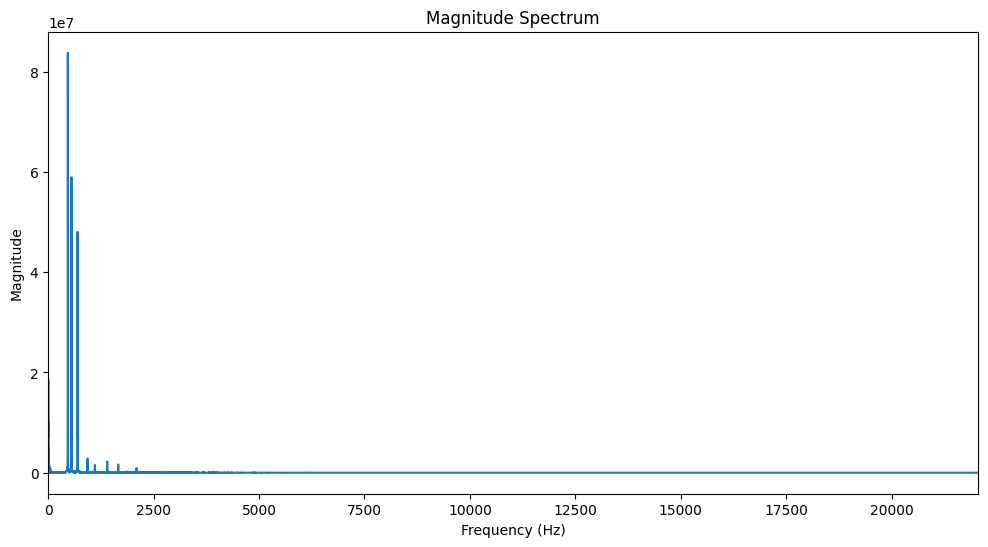

In [26]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import fft

rate, audio = wavfile.read("blissful_bell.wav")

channel_1 = audio[:, 0]

channel_fft = fft(channel_1)

frequencies = np.linspace(0, rate, len(channel_fft))

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(channel_fft))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, rate // 2)
plt.show()